In [1]:
import geopandas
import json
import rtree

# Polygons

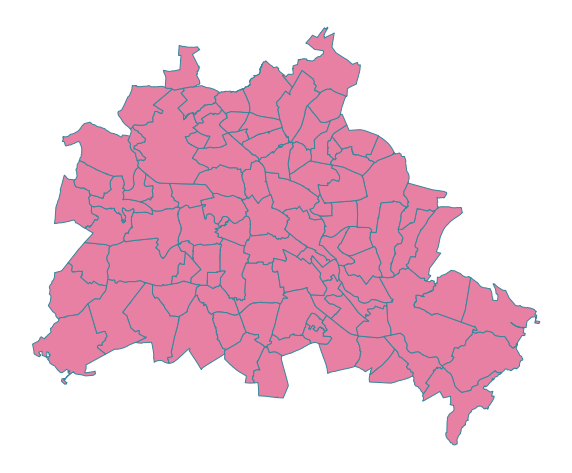

In [2]:
kieze = geopandas.read_file("lor_ortsteile.geojson")
kiezeAx = kieze.plot(color="#E880A4", edgecolor="#36879C", figsize=(10,10))
kiezeAx.set_axis_off();   

In [3]:
kieze

,gml_id,spatial_name,spatial_alias,spatial_type,OTEIL,BEZIRK,FLAECHE_HA,geometry
0,re_ortsteil.0101,0101,Mitte,Polygon,Mitte,Mitte,1063.8748,"POLYGON ((13.41649 52.52696, 13.41635 52.52702..."
1,re_ortsteil.0102,0102,Moabit,Polygon,Moabit,Mitte,768.7909,"POLYGON ((13.33884 52.51974, 13.33884 52.51974..."
2,re_ortsteil.0103,0103,Hansaviertel,Polygon,Hansaviertel,Mitte,52.5337,"POLYGON ((13.34322 52.51557, 13.34323 52.51557..."
3,re_ortsteil.0104,0104,Tiergarten,Polygon,Tiergarten,Mitte,516.0672,"POLYGON ((13.36879 52.49878, 13.36891 52.49877..."
4,re_ortsteil.0105,0105,Wedding,Polygon,Wedding,Mitte,919.9112,"POLYGON ((13.34656 52.53879, 13.34664 52.53878..."
...,...,...,...,...,...,...,...,...
91,re_ortsteil.1207,1207,Waidmannslust,Polygon,Waidmannslust,Reinickendorf,223.7780,"POLYGON ((13.33106 52.61487, 13.33097 52.61479..."
92,re_ortsteil.1208,1208,Lübars,Polygon,Lübars,Reinickendorf,499.1961,"POLYGON ((13.36693 52.62535, 13.36692 52.62533..."
93,re_ortsteil.1209,1209,Wittenau,Polygon,Wittenau,Reinickendorf,587.1148,"POLYGON ((13.34413 52.58284, 13.34414 52.58285..."
94,re_ortsteil.1210,1210,Märkisches Viertel,Polygon,Märkisches Viertel,Reinickendorf,323.9201,"POLYGON ((13.34756 52.59008, 13.34757 52.59009..."


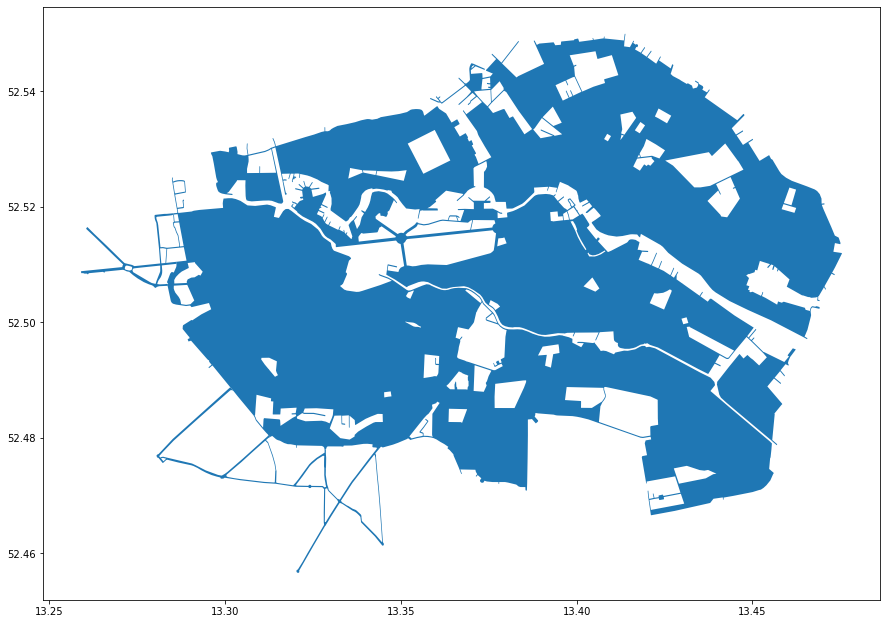

In [4]:
flexZone = geopandas.read_file("flexzone_bn.json")
flexZoneAx = flexZone.plot(figsize=(15,15))

In [5]:
flexZone

,color,fill,name,domain,cityId,category,geometry
0,#ff00e7,#ff00e7,Berlin Nord,bn,362,chargeable_return,"POLYGON ((13.45977 52.50614, 13.46055 52.50740..."
1,#ff00e7,#ff00e7,Berlin OstWest,bn,362,chargeable_return,"POLYGON ((13.45321 52.49485, 13.45907 52.49310..."
2,#ff00e7,#ff00e7,Berlin Sued,bn,362,chargeable_return,"POLYGON ((13.30150 52.48873, 13.30150 52.48873..."
3,#00CBFF,#00CBFF,Berlin RGS West,bn,362,free_return,"POLYGON ((13.28534 52.51885, 13.28530 52.51852..."
4,#00CBFF,#00CBFF,Berlin RGS Sued,bn,362,free_return,"POLYGON ((13.30150 52.48873, 13.30239 52.48810..."


# merging

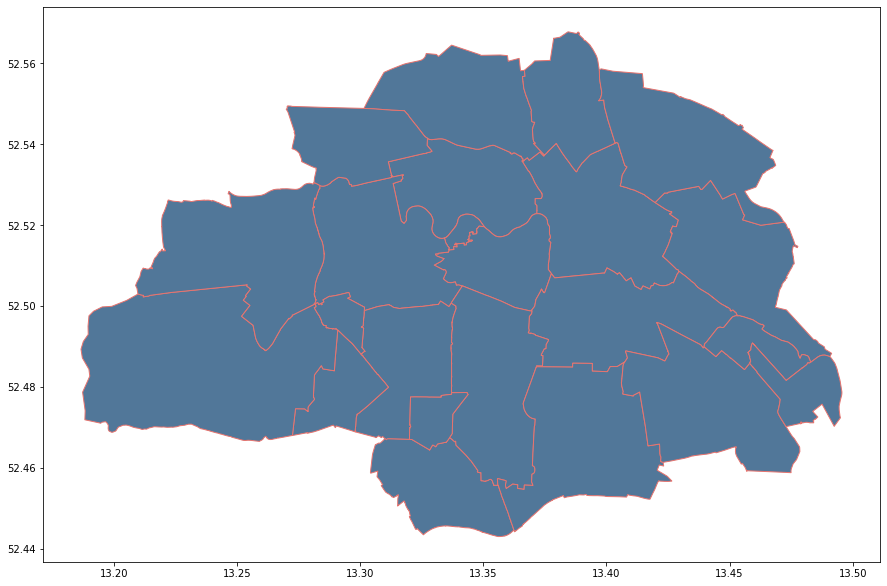

In [11]:
colors = ['#517799', '#E6746F', '#91BDE6', '#E68D2C']

selectedKieze = kieze[kieze['gml_id'].isin(kieze.overlay(flexZone, how='intersection')['gml_id'])]
selectedKiezeAx = selectedKieze.plot(color=colors[0], edgecolor=colors[1], figsize=(15,15))

flexZone = geopandas.read_file("flexzone_bn.json")
# flexZone.plot(ax=selectedKiezeAx, color=colors[2], alpha=0.5)